In [11]:
#Example queries

# maximum amount of delays ordered by month

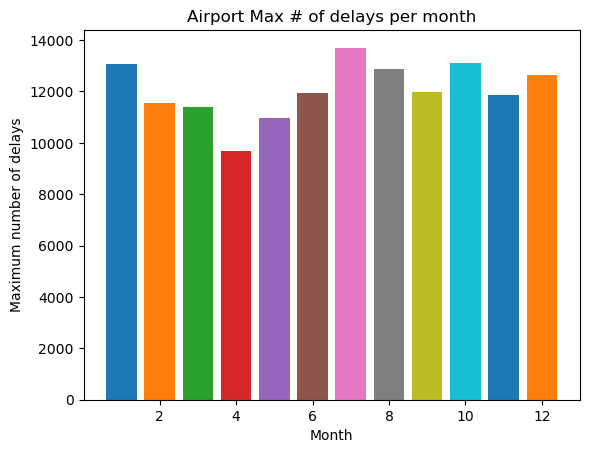

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
from importlib import reload

PREDICTION_FILE = 'area_predictions.csv'

FILEPATH = "https://corgis-edu.github.io/corgis/datasets/csv/airlines/airlines.csv"

df = pd.read_csv(FILEPATH)

rows, columns = df.shape

new_column = (
    df["Statistics.# of Delays.National Aviation System"]
    .add(df["Statistics.# of Delays.Carrier"])
    .add(df["Statistics.# of Delays.Late Aircraft"])
    .add(df["Statistics.# of Delays.Security"])
    .add(df["Statistics.# of Delays.Weather"])
)

maxes = []

df.insert(columns, "SumDelays", new_column, True)

df["Time.Label"] = pd.to_datetime(df["Time.Label"])

for i in range(1, 13):
    filtered_months = df[['Airport.Code', 'Airport.Name', 'Time.Label', 'SumDelays']][df['Time.Label'].dt.month == i]
    max_delays = filtered_months['SumDelays'].max()
    plt.bar(i, max_delays)
    maxes.append(max_delays)

vertical_ticks = np.linspace(0, np.average(maxes), 25).tolist().extend([max(maxes)])

plt.ylabel("Maximum number of delays")
plt.xlabel("Month")
plt.yticks(vertical_ticks)
plt.title("Airport Max # of delays per month")

plt.show()

In [3]:
df = pd.read_csv("homeprices.csv")
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


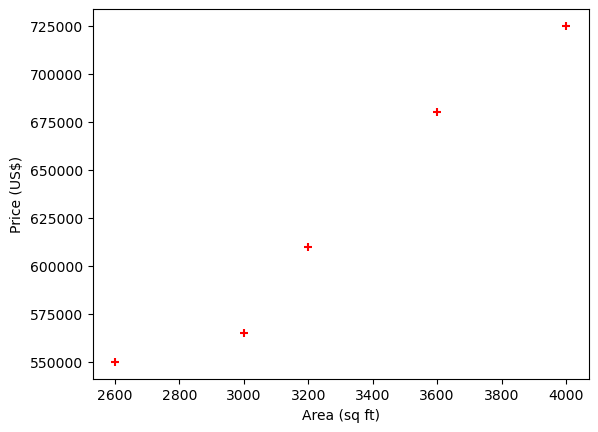

In [33]:
from importlib import reload

plt = reload(plt)
plt.xlabel("Area (sq ft)")
plt.ylabel("Price (US$)")
plt.scatter(df.area, df.price, color='red', marker='+')

In [36]:
reg = linear_model.LinearRegression()
reg.fit(df[['area']], df[['price']])



LinearRegression()

In [46]:
reg.predict([[5000]])


c:\Users\flyin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[859554.79452055]])

In [42]:
reg.coef_

array([[135.78767123]])

In [43]:
reg.intercept_

array([180616.43835616])

In [49]:
y = reg.coef_*5000+reg.intercept_
y

array([[859554.79452055]])

In [51]:
df = pd.DataFrame({ 'area': [1000, 1500, 2300, 3540, 4120, 4560, 5490, 3460, 4750, 2300, 9000, 8600, 7100]})
df.to_csv('areas.csv', index=False)

In [53]:
d = pd.read_csv(PREDICTION_FILE)
d.head(3)

,area
0,1000
1,1500
2,2300


In [55]:
p = reg.predict(d)

In [61]:
d['prices'] = p
d
d.to_csv(PREDICTION_FILE, index=False)

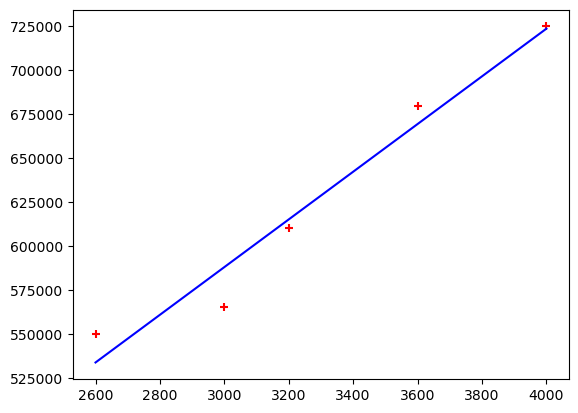

In [73]:
%matplotlib inline

d = pd.read_csv('homeprices.csv')

plt.scatter(d[['area']], d[['price']], color='red', marker='+')
plt.plot(d[['area']], reg.predict(d[['area']]), color="blue")

c:\Users\flyin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


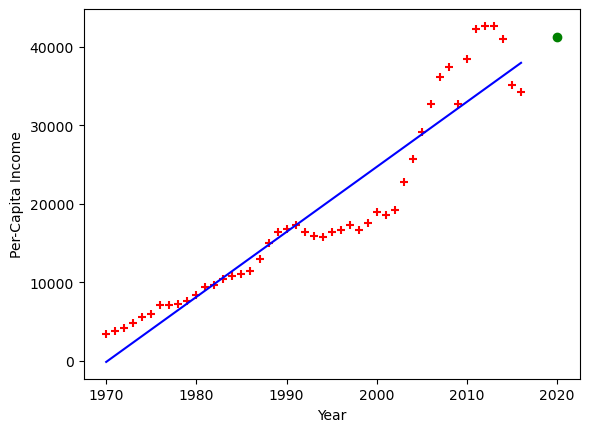

In [110]:
## Calculating canada's per capita income
## find out the predicted income in year 2020

income = pd.read_csv('canada_per_capita_income.csv')

income_model = linear_model.LinearRegression()


income = income.rename(columns={'per capita income (US$)': 'per_capita_income'})


income_model.fit(income[['year']], income[['per_capita_income']])

%matplotlib inline

plt.xlabel("Year")
plt.ylabel("Per-Capita Income")
plt.scatter(income[['year']], income[['per_capita_income']], color='red', marker='+')
plt.plot(income[['year']], income_model.predict(income[['year']]), color='blue')
plt.plot(2020, income_model.predict([[2020]])[0][0], marker='o', markeredgecolor='green', markerfacecolor='green')

c:\Users\flyin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\flyin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0.5, 1.0, '# of airport delays by year')

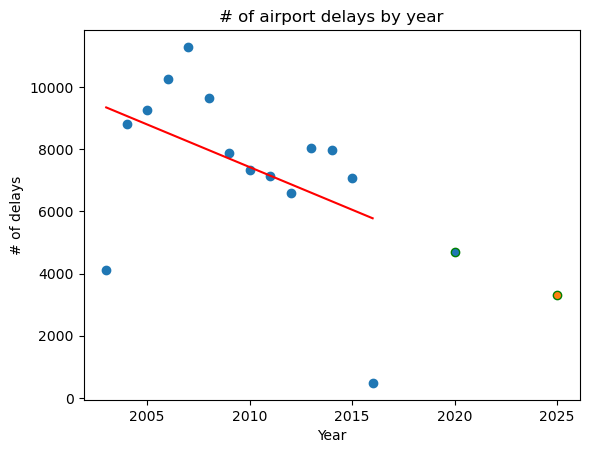

In [207]:
## predict the # of delays in the coming years for airlines

airport_df = pd.read_csv('./pandaspractice/airlines.csv')

# airport_df[['Time.Year']]

grouped_df = airport_df.groupby(by='Time.Year').sum()

#airport_df[['Statistics.# of Delays.Carrier', 'Statistics.# of Delays.Late Aircraft', 'Statistics.# of Delays.National Aviation System', 'Statistics.# of Delays.Security', 'Statistics.# of Delays.Weather']].aggregate(np.sum)

grouped_df['sum_delays'] = grouped_df['Statistics.# of Delays.Carrier'].add(grouped_df['Statistics.# of Delays.Late Aircraft']).add(grouped_df['Statistics.# of Delays.National Aviation System']).add(grouped_df['Statistics.# of Delays.Security']).add(grouped_df['Statistics.# of Delays.Weather'])

airport_model = linear_model.LinearRegression()

grouped_df = grouped_df.reset_index()


airport_model.fit(grouped_df[['Time.Year']], grouped_df[['sum_delays']])

%matplotlib inline

plt.scatter(grouped_df[['Time.Year']], grouped_df[['sum_delays']].apply(lambda x: x / 100))

plt.plot(grouped_df[['Time.Year']], [x / 100 for x in airport_model.predict(grouped_df[['Time.Year']])], color='red')

plt.plot(2020, airport_model.predict([[2020]])[0][0] / 100, marker='o', markeredgecolor='green')

plt.plot(2025, airport_model.predict([[2025]])[0][0] / 100, marker='o', markeredgecolor='green')

plt.ylabel('# of delays')
plt.xlabel('Year')
plt.title('# of airport delays by year')


In [220]:
airport_df = pd.read_csv('./pandaspractice/airlines.csv')

airport_multivariate_prediction = linear_model.LinearRegression()

grouped_by_month = airport_df.groupby(by='Time.Year').sum()

# airport_multivariate_prediction.fit(airport_df[['Statistics.Flights.Total', 'Time.Year', '']])

grouped_by_month['sum_delays'] = grouped_by_month['Statistics.# of Delays.Carrier'].add(grouped_by_month['Statistics.# of Delays.Late Aircraft']).add(grouped_by_month['Statistics.# of Delays.National Aviation System']).add(grouped_by_month['Statistics.# of Delays.Security']).add(grouped_by_month['Statistics.# of Delays.Weather']);

grouped_by_month = grouped_by_month.reset_index()

airport_multivariate_prediction.fit(grouped_by_month[['Time.Year', 'sum_delays']], grouped_by_month['Statistics.Flights.Total'])


LinearRegression()

In [246]:
from math import floor
from word2number import w2n

hiring_df = pd.read_csv('hiring.csv')

hiring_df['experience'] = hiring_df['experience'].fillna(value='zero')

hiring_df['test_score(out of 10)'] = hiring_df['test_score(out of 10)'].fillna(floor(hiring_df['test_score(out of 10)'].mean()))


hiring_df['experience'] = hiring_df['experience'].apply(lambda x: w2n.word_to_num(x))

hiring_df['experience'] = hiring_df['experience'].replace(0, floor(hiring_df['experience'].mean()))


hiring_model = linear_model.LinearRegression()

hiring_model.fit(hiring_df[['experience', 'test_score(out of 10)', 'interview_score(out of 10)']], hiring_df['salary($)'])

hiring_model.predict([[12, 10, 10]])


c:\Users\flyin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([96560.88988979])